# 堆栈stack
就像一堆书，我们最后堆上去的总是在最上面，拿的的时候就会拿到最后堆上去的，所以叫后进先出(LIFO)

In [2]:
class Stack:
     def __init__(self):
         self.items = []

     def isEmpty(self):
         return self.items == []

     def push(self, item):
         self.items.append(item)

     def pop(self):
         return self.items.pop()

     def peek(self):
         return self.items[len(self.items)-1]

     def size(self):
         return len(self.items)
        
#from pythonds.basic.stack import Stack
#Note：
#The pythonds module contains implementations of all data structures discussed in this book. It is structured according to the sections: basic, trees, and graphs. The module can be downloaded from pythonworks.org.

s=Stack()

print(s.isEmpty())
s.push(4)
s.push('dog')
print(s.peek())
s.push(True)
print(s.size())
print(s.isEmpty())
s.push(8.4)
print(s.pop())
print(s.pop())
print(s.size())

True
dog
3
False
8.4
True
2


## 简单括弧平衡问题Simple Balanced parentheses
Balanced parentheses means that each opening symbol has a corresponding closing symbol and the pairs of parentheses are properly nested. Consider the following correctly balanced strings of parentheses:
(()()()())

(((())))

(()((())()))

In [4]:
def parChecker(symbolString):
    s = Stack()
    balanced = True
    index = 0
    while index < len(symbolString) and balanced:
        symbol = symbolString[index]
        if symbol == "(":
            s.push(symbol)
        else:
            if s.isEmpty():
                balanced = False
            else:
                s.pop()

        index = index + 1

    if balanced and s.isEmpty():
        return True
    else:
        return False

print(parChecker('((()))'))
print(parChecker('(()'))

True
False


解题思维集中在用stack的push和pop实现左右括号的匹配

## 一般括弧平衡问题Balanced parentheses(A general case)

The general problem of balancing and nesting different kinds of opening and closing symbols occurs frequently. For example, in Python square brackets, [ and ], are used for lists; curly braces, { and }, are used for dictionaries; and parentheses, ( and ), are used for tuples and arithmetic expressions. It is possible to mix symbols as long as each maintains its own open and close relationship. Strings of symbols such as

{ { ( [ ] [ ] ) } ( ) }

[ [ { { ( ( ) ) } } ] ]

[ ] [ ] [ ] ( ) { }

In [6]:
def parChecker(symbolString):
    s = Stack()
    balanced = True
    index = 0
    while index < len(symbolString) and balanced:
        symbol = symbolString[index]
        if symbol in "([{":
            s.push(symbol)
        else:
            if s.isEmpty():
                balanced = False
            else:
                top = s.pop()
                if not matches(top,symbol):
                       balanced = False
        index = index + 1
    if balanced and s.isEmpty():
        return True
    else:
        return False

def matches(open,close):
    opens = "([{"
    closers = ")]}"
    return opens.index(open) == closers.index(close)

print(matches("(",")"))
print(matches("(","}"))
print(parChecker('{{([][])}()}'))
print(parChecker('[{()]'))


True
False
True
False


解题思路在上面的stack实现左右括弧计数的基础上加了一个不同括弧的匹配函数

# 十进制转二进制Converting Decimal Numbers to Binary Numbers
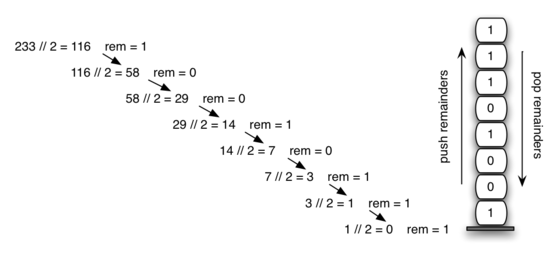

In [7]:
def divideBy2(decNumber):
    remstack = Stack()

    while decNumber > 0:
        rem = decNumber % 2
        remstack.push(rem)
        decNumber = decNumber // 2

    binString = ""
    while not remstack.isEmpty():
        binString = binString + str(remstack.pop())

    return binString

print(divideBy2(42))


101010


# 队列queue
我们想象一条管道，总是从一口进，另一口出，所以先进去的元素先出来，所以叫先进先出(FIFO)。先进去的叫队首，后进去的叫队尾。

- Queue() creates a new queue that is empty. It needs no parameters and returns an empty queue.
- enqueue(item) adds a new item to the rear of the queue. It needs the item and returns nothing.
- dequeue() removes the front item from the queue. It needs no parameters and returns the item. The queue is modified.
- isEmpty() tests to see whether the queue is empty. It needs no parameters and returns a boolean value.
- size() returns the number of items in the queue. It needs no parameters and returns an integer.

In [8]:
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)
q=Queue()

q.enqueue(4)
q.enqueue('dog')
q.enqueue(True)
print(q.size())
q.dequeue()
    



3


4

## 传炸弹（烫手山芋）问题Simulation: Hot Potato
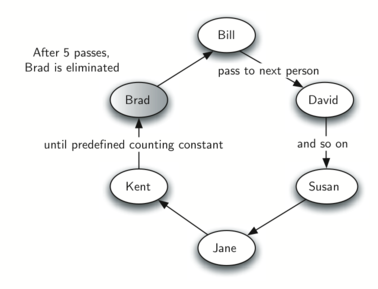
In this game children line up in a circle and pass an item from neighbor to neighbor as fast as they can. At a certain point in the game, the action is stopped and the child who has the item (the potato) is removed from the circle. Play continues until only one child is left.
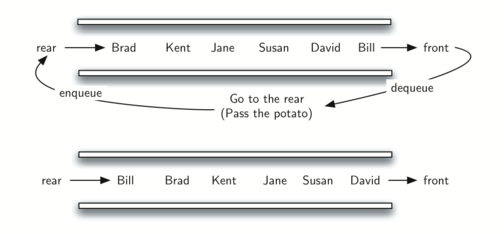

In [9]:
def hotPotato(namelist, num):
    simqueue = Queue()
    for name in namelist:
        simqueue.enqueue(name)

    while simqueue.size() > 1:
        for i in range(num):
            simqueue.enqueue(simqueue.dequeue())

        simqueue.dequeue()

    return simqueue.dequeue()

print(hotPotato(["Bill","David","Susan","Jane","Kent","Brad"],7))


Susan


解题思路是队列的队首变队尾进行循环一定的次数。

# 双端队列Dequeue
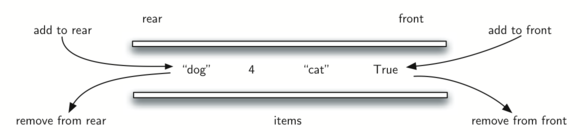
不局限于FIFO和LIFO，可以从队列的两端加入或取出元素。还是先进去的叫队首（front）

- Deque() creates a new deque that is empty. It needs no parameters and returns an empty deque.
- addFront(item) adds a new item to the front of the deque. It needs the item and returns nothing.
- addRear(item) adds a new item to the rear of the deque. It needs the item and returns nothing.
- removeFront() removes the front item from the deque. It needs no parameters and returns the item. The deque is modified.
- removeRear() removes the rear item from the deque. It needs no parameters and returns the item. The deque is modified.
- isEmpty() tests to see whether the deque is empty. It needs no parameters and returns a boolean value.
- size() returns the number of items in the deque. It needs no parameters and returns an integer.

In [11]:
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)

## 回文检查Palindrome-Checker
A palindrome is a string that reads the same forward and backward, for example, radar, toot, and madam. We would like to construct an algorithm to input a string of characters and check whether it is a palindrome.
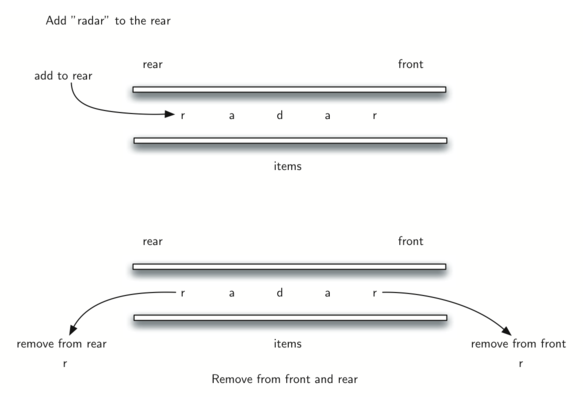

In [12]:
def palchecker(aString):
    chardeque = Deque()

    for ch in aString:
        chardeque.addRear(ch)

    stillEqual = True

    while chardeque.size() > 1 and stillEqual:
        first = chardeque.removeFront()
        last = chardeque.removeRear()
        if first != last:
            stillEqual = False

    return stillEqual

print(palchecker("lsdkjfskf"))
print(palchecker("radar"))


False
True


# 列表list
列表是一种记录数据间相对关系的数据结构。也是Python内置的一种结构
- List() creates a new list that is empty. It needs no parameters and returns an empty list.
- add(item) adds a new item to the list. It needs the item and returns nothing. Assume the item is not already in the list.
- remove(item) removes the item from the list. It needs the item and modifies the list. Assume the item is present in the list.
- search(item) searches for the item in the list. It needs the item and returns a boolean value.
- isEmpty() tests to see whether the list is empty. It needs no parameters and returns a boolean value.
- size() returns the number of items in the list. It needs no parameters and returns an integer.
- append(item) adds a new item to the end of the list making it the last item in the collection. It needs the item and returns nothing. Assume the item is not already in the list.
- index(item) returns the position of item in the list. It needs the item and returns the index. Assume the item is in the list.
- insert(pos,item) adds a new item to the list at position pos. It needs the item and returns nothing. Assume the item is not already in the list and there are enough existing items to have position pos.
- pop() removes and returns the last item in the list. It needs nothing and returns an item. Assume the list has at least one item.
- pop(pos) removes and returns the item at position pos. It needs the position and returns the item. Assume the item is in the list.

## 一种无顺序列表：链表Linked Lists
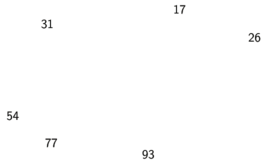
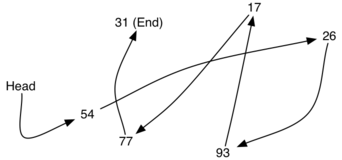
我们要知道列表的头尾，然后每个元素的后个元素，将它们连接起来。
### 节点Node
First, the node must contain the list item itself. We will call this the data field of the node. In addition, each node must hold a reference to the next node.
一个节点要知道他自己的值，还要知道后面一个节点的地址。


In [5]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext
        
temp = Node(93)
print(temp.getData())
print(temp.getNext())

93
None


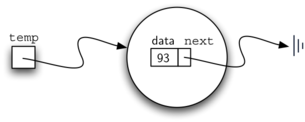
### 无顺序单向链表Unordered List
一个链表其实就是一些节点的集合，链表就是把这些节点连接起来。

In [18]:
class UnorderedList:

    def __init__(self):
        self.head = None
    #The isEmpty method simply checks to see if the head of the list is a reference to None.
    def isEmpty(self):
        return self.head == None
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()
        return count
    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found
    def remove(self,item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()

        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())
mylist = UnorderedList()
print(mylist.isEmpty())

True


#### init
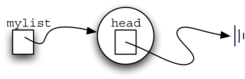
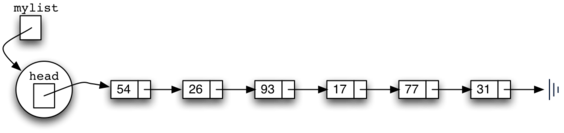

#### add
我们的add方法执行两步，先将新元素指向原来的head，再讲链表的head指向新元素。所以每次新加入的元素都在head处。
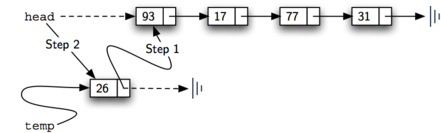

#### search
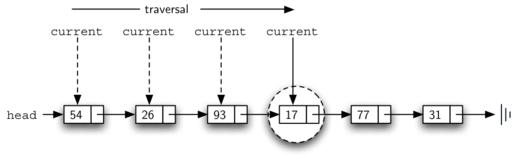

#### remove
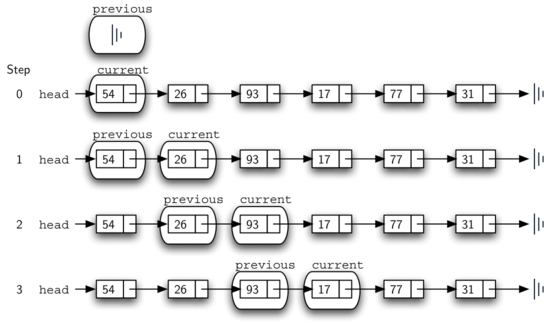
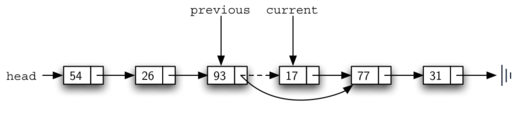
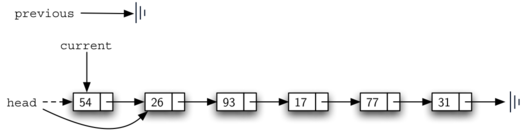

In [19]:
mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(93)
mylist.add(26)
mylist.add(54)
print(mylist.isEmpty())
print(mylist.size())
print(mylist.search(17))
mylist.remove(17)
print(mylist.size())

False
6
True
5


# 有序单向链表Ordered List
- OrderedList() creates a new ordered list that is empty. It needs no parameters and returns an empty list.
- add(item) adds a new item to the list making sure that the order is preserved. It needs the item and returns nothing. Assume the item is not already in the list.
- remove(item) removes the item from the list. It needs the item and modifies the list. Assume the item is present in the list.
- search(item) searches for the item in the list. It needs the item and returns a boolean value.
- isEmpty() tests to see whether the list is empty. It needs no parameters and returns a boolean value.
- size() returns the number of items in the list. It needs no parameters and returns an integer.
- index(item) returns the position of item in the list. It needs the item and returns the index. Assume the item is in the list.
- pop() removes and returns the last item in the list. It needs nothing and returns an item. Assume the list has at least one item.
- pop(pos) removes and returns the item at position pos. It needs the position and returns the item. Assume the item is in the list.

In [20]:
class OrderedList:
    def __init__(self):
        self.head = None
    def search(self,item):
        current = self.head
        found = False
        stop = False
        while current != None and not found and not stop:
            if current.getData() == item:
                found = True
            else:
                if current.getData() > item:
                    stop = True
                else:
                    current = current.getNext()

        return found
    def add(self,item):
        current = self.head
        previous = None
        stop = False
        while current != None and not stop:
            if current.getData() > item:
                stop = True
            else:
                previous = current
                current = current.getNext()

        temp = Node(item)
        if previous == None:
            temp.setNext(self.head)
            self.head = temp
        else:
            temp.setNext(current)
            previous.setNext(temp)